# 파이토치 튜토리얼

## 왜 파이토치인가?

### 장점

- 문서화 : 파이토치 튜토리얼와 같은 문서화가 훌륭하게 되어 있음. 파이토치에서 막힐 때마다 공식 문서 참고 가능

- 쉬운 난이도와 편의성 : 자유도, 코드 가독성, 넘파이와 비슷한 함수

- 오토그래드 : 계산 그래프를 따라 **자동으로 역전파가 계산**된다.

### 단점

텐서플로에 비해 후발주자, 공개 코드들이 텐서플로로 작성되는 경우가 많았음.

상용화 지원은 아직 텐서플로가 앞선다 평가.

## 텐서란?

텐서는 **딥러닝에서 가장 기본이 되는 단위 중 하나**. 스칼라, 벡터, 행렬, 그리고 텐서를 통해 딥러닝의 연산을 수행할 수 있음.

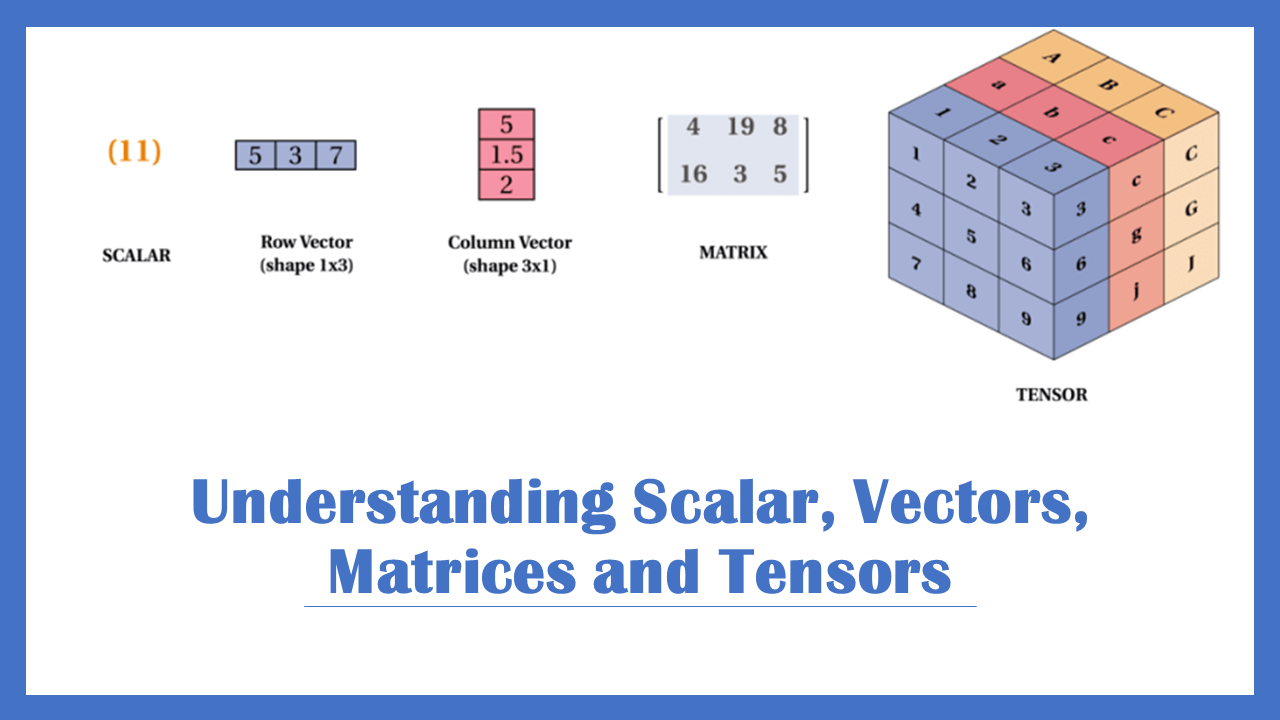

스칼라는 0차원, 벡터는 1차원, 행렬은 2차원, 3차원 이상은 텐서.

### 텐서의 표현

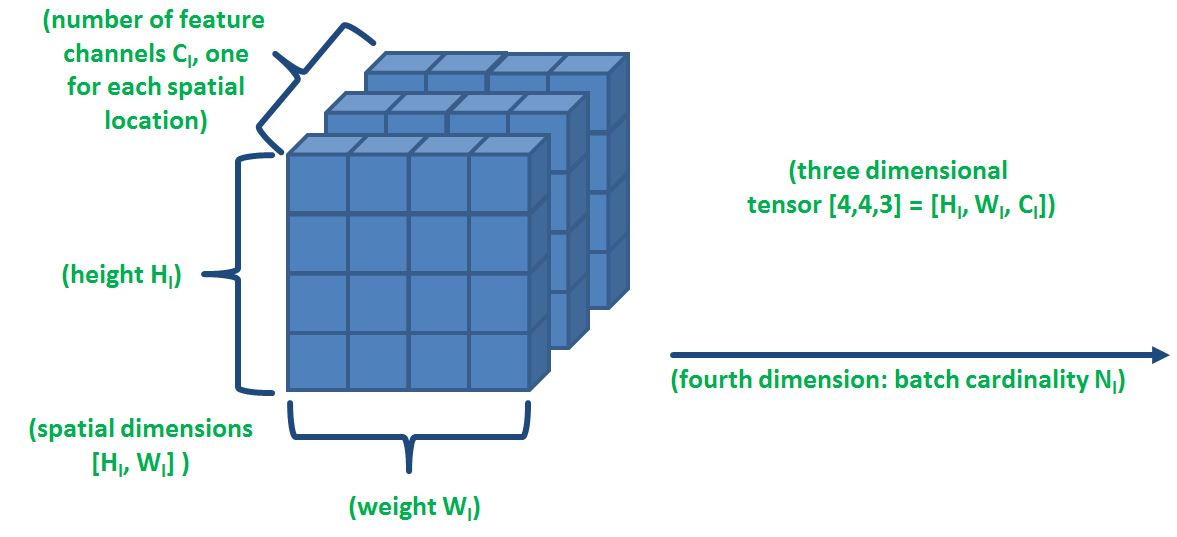

텐서의 순서는 정해져 있는 것은 아님. 하지만 일괄적으로 자신만의 기준을 만들어 표현하는 것이 훨씬 효율적임.

이 책에서는 $(k, n, m)$으로 나타낼 것이며, 첫 번째 차원 k가 세로축의 크기, n이 가로축의 차원, m이 마지막 남은 축의 차원을 나타낸다.

즉, $x \in R^{k * n * m}, \left | x \right | = (k, n, m)$으로 표현한다.

### 텐서의 모양들

**데이터 분석을 수행할 때는 주로 테이블 형태의 데이터셋을 다루게 된다.**

- 여러 개의 열이 존재, 각 샘플들은 각 열에 대해서 값을 가지며 하나의 행을 이룸.

- $n$은 열의 개수를 나타내고, 가로축의 크기를 나타냄.

- 열은 피쳐라고 부르며, **각 샘플의 고유한 값을 설명**.

- 딥러닝은 병렬 연산을 수행. $N$개의 샘플을 신경망에 통과시킨다면 이 $N$번의 연산을 각각 수행하는 것이 아니라 메모리의 크기가 허용되는 범위 안에서 덩어리로 통과시킨다. 배치 확습을 생각하자.


**자연어 처리는 문장 데이터셋을 다루게 된다.**

- 문장은 단어(token)들이 모여서 이루어진 시퀀셜 데이터이다. 시퀀셜 데이터는 내부 토큰들의 순서 관계에 의해서 속성이 정의된다.

- 토큰은 각각이 의미를 지니기 때문에 의미를 나타내기 위한 벡터로 표현된다. 우리는 이것을 **단어 임베딩 벡터**라고 한다.

- 단어들이 모여서 문장이 되기 때문에, 단어 임베딩 벡터가 모여 문장 행렬이 되고, 이는 3차원의 텐서가 된다.

- 각 문장은 최대 $l$개의 단어를 갖고 있고, 이것은 문장의 길이를 나타낸다. 그리고 각 단어는 $d$차원의 벡터로 표현될 것이다. 따라서 벡터는 $(N, l, d)$과 같이 표현된다.

- 이 데이터의 가장 큰 특징은 길이가 전부 제각각이라는 것이다. 프로그램이 실행되는 와중에 덩어리 텐서의 크기가 가변적이게 되므로 일반적인 선형 계층 신경망으로 처리하기 어려움. 따라서 RNN, Transformer 등을 이용하게 된다.


**컴퓨터비전 : 이미지 데이터셋**

- 흑백 이미지 데이터는 세로축 * 가로축의 픽셀로 이루어져 있으며, 그리고 여러 장의 이미지 행렬이 합쳐지면 3차원의 텐서가 된다.

- 컬러 이미지 데이터는 컬러 픽셀을 RGB로 표현한다. 이를 채널이라 하고, RGB에는 3개의 채널이 존재한다.

- 따라서 흑백 이미지는 한 장의 이미지를 표현하는 데 행렬, 컬러 이미지는 한 장의 이미지를 표현하는 데 3차원의 텐서가 필요하다. 컬러 이미지 덩어리를 표현하기 위해서는 4차원의 텐서가 필요하다.

- 테이블 데이터와 달리 각 열의 값이 굉장히 중요하지 않은데, 그림이 한 픽셀 씩 평행 이동하더라도 그림의 속성이 바뀌지 않기 때문이다. 따라서 이런 이미지의 속성을 반영하기 위해 일반적인 계층보다는 합성곱신경망(CNN)을 주로 사용한다. 

### 파이토치 텐서 생성하기

In [2]:
import torch

ft = torch.FloatTensor([[1, 2], [3,4]])
ft

tensor([[1., 2.],
        [3., 4.]])

실수형 값으로 텐서가 생성되었다. 

이처럼 다차원 배열 값을 넣어 원하는 요소 값을 갖는 텐서를 직접 생성할 수 있다.

In [6]:
lt = torch.LongTensor([[1,2], [3,4]]) # 64비트 integer
bt = torch.ByteTensor([[1,0], [0,1]]) # 8비트 integer
x = torch.FloatTensor(3,2) # 32비트 float. 메모리 용량 위해 64비트보다는 32비트가 선호됨.

print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


### 넘파이 호환

대부분의 함수가 넘파이와 비슷한 사용법을 가지고 있다.

In [7]:
import numpy as np

x = np.array([[1,2], [3,4]]) # numpy darray 정의
print(x, type(x))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>


In [11]:
x = torch.from_numpy(x)
print(x, type(x))

tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>


반대로 파이토치 텐서를 넘파이로 변환할 수 있다.

In [12]:
x = x.numpy()
print(x, type(x))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>


### 텐서 타입 변환

단순히 원하는 탕비을 함수로 호출한다.

In [13]:
ft.long() # 64비트 integer로 변환

tensor([[1, 2],
        [3, 4]])

In [14]:
lt.float() # 32비트 float로 변환

tensor([[1., 2.],
        [3., 4.]])

### 텐서 크기 구하기

In [16]:
x = torch.FloatTensor(3, 2, 2)
print(x.size())

torch.Size([3, 2, 2])


In [18]:
print(x.shape)

torch.Size([3, 2, 2])


크기 정보는 list에 담겨있다고 생가갛면 된다.

특정 차원의 크기를 알기 위해서는 shape 속성의 해당 차원 인덱스에 접근하거나, size() 함수의 인자에 원하는 차원의 인덱스를 넣어주면 된다.

음수를 넣어주면 **뒤에서부터의 순서에 해당**된다.

In [19]:
print(x.size(-1))

2


In [20]:
print(x.shape[-1])

2


텐서 차원의 개수를 알기 위해서는 dim()을 활용한다. shape 속성의 배열 크기와 같다.

In [21]:
print(x.dim())

3


In [22]:
print(len(x.size()))

3


## 기본 연산

### 요소별 산술 연산

In [25]:
a = torch.FloatTensor([[1,2], [3,4]])
b = torch.FloatTensor([[2,2], [3,3]])
a + b

tensor([[3., 4.],
        [6., 7.]])

빨셈, 곱셈, 나눗셈, 제곱도 다음와 같이 이루어진다.

In [26]:
a - b # 뺄셈

tensor([[-1.,  0.],
        [ 0.,  1.]])

In [27]:
a * b # 곱셈, 단순히 요소들을 곱하는 것.

tensor([[ 2.,  4.],
        [ 9., 12.]])

In [28]:
a / b # 나눗셈

tensor([[0.5000, 1.0000],
        [1.0000, 1.3333]])

In [29]:
a ** b # 제곱

tensor([[ 1.,  4.],
        [27., 64.]])

논리 연산자도 구현할 수 있다.

In [30]:
a == b

tensor([[False,  True],
        [ True, False]])

In [31]:
a != b

tensor([[ True, False],
        [False,  True]])

## 인플레이스 연산 

앞에서 수행한 연산들의 결과 텐서는 메모리에 새롭게 할당된다. 빈 메모리의 공간에 결과 텐서가 할당되고 텐서의 값이 위치하게 된다.

하지만 인플레이스 연산은 같은 산술 연산을 수행하지만 **기존 텐서에 결과가 저장**된다는 차이가 있다.

In [32]:
print(a)

tensor([[1., 2.],
        [3., 4.]])


In [33]:
print(a.mul(b))

tensor([[ 2.,  4.],
        [ 9., 12.]])


a.mul(b)의 연산 결과 텐서는 새로운 메모리에 할당된다. 따라서 다시 텐서 a를 출력하면 a의 값이 그대로이다.

인플레이스 연산들은 밑줄이 함수명 뒤에 붙어있다. 따라서 곱셈의 인플레이스 연산 함수는 mul_()로 대응된다.

In [35]:
print(a.mul_(b))

tensor([[ 2.,  4.],
        [ 9., 12.]])


In [36]:
print(a)

tensor([[ 2.,  4.],
        [ 9., 12.]])


그런데 이 곱셈 연산의 결과는 텐서 a에 저장되어 있다.

즉, 메모리의 새로운 공간에 계산 결과가 저장되는 것이 아니라 기존 a의 공간에 계산 결과가 저장된다.

새로운 메모리의 공간을 할당하는 작업이 생략되기 때문에 속도나 공간 사용 측면에서 효율적일 것 같지만, 파이토치 측은 가비지 컬렉터가 효율적으로 작동하기 때문에 굳이 인플레이스 연산을 사용할 필요는 없다고 밝히고 있다.

### 차원 축소 연산 : 합과 평균

하나의 텐서에서 sum()이나 mean()을 사용해 행렬 전체 요소의 합이나 평균을 구할 수 있다. 이 값들은 scalar로 저장되므로 차원이 축소된다 말할 수 있다.

In [37]:
x = torch.FloatTensor([[1,2], [3,4]])
print(x.sum())

tensor(10.)


In [38]:
print(x.sum(dim=0))

tensor([4., 6.])


dim = 0이면 첫 번째 차원을 이야기하는 것이므로 행렬의 세로축에 대해 합 연산을 수행한다.

dim의 인자값으로 -1을 넣을 수도 있는데, 이는 뒤에서 첫 번째 차원을 의미한다.

여기서는 2개의 차원만 존재하므로 dim=1을 넣어준 것과 동일하다.

In [39]:
print(x.sum(dim = -1))

tensor([3., 7.])


## 텐서 형태 변환

텐서의 전체 요소 개수는 유지하되 모양을 바꿔보자.

### View 함수

In [40]:
x = torch.FloatTensor(3,2,2)
print(x.view(12)) # 12 = 3 * 2 * 2

tensor([9.8091e-45, 6.7262e-44, 7.0065e-44, 6.3058e-44, 7.0065e-44, 6.7262e-44,
        1.1771e-43, 6.7262e-44, 7.8473e-44, 8.1275e-44, 6.8664e-44, 7.8473e-44])


In [41]:
print(x.view(3,4))

tensor([[9.8091e-45, 6.7262e-44, 7.0065e-44, 6.3058e-44],
        [7.0065e-44, 6.7262e-44, 1.1771e-43, 6.7262e-44],
        [7.8473e-44, 8.1275e-44, 6.8664e-44, 7.8473e-44]])


중요한 점은 텐서의 요소 개수는 유지되어야 한다는 것.

새로운 크기가 기존 텐서의 요소 개수와 맞지 않으면 오류가 발생한다. 하지만 view 함수에 -1을 활용하면 일일이 요소 개수를 맞출 필요가 없다.

-1이 들어간 차원의 크기는 다른 차원의 값들을 곱하고 남은 필요한 값이 자동으로 채워지게 된다.

In [42]:
print(x.view(-1))

tensor([9.8091e-45, 6.7262e-44, 7.0065e-44, 6.3058e-44, 7.0065e-44, 6.7262e-44,
        1.1771e-43, 6.7262e-44, 7.8473e-44, 8.1275e-44, 6.8664e-44, 7.8473e-44])


In [43]:
print(x.view(3, -1))

tensor([[9.8091e-45, 6.7262e-44, 7.0065e-44, 6.3058e-44],
        [7.0065e-44, 6.7262e-44, 1.1771e-43, 6.7262e-44],
        [7.8473e-44, 8.1275e-44, 6.8664e-44, 7.8473e-44]])


이 때 view 함수의 결과 **텐서 주소는 바뀌지 않는다**.

따라서 다음 코드에서 $y$의 값이 바뀐다면 $x$의 값도 바뀌게 된다.

In [48]:
y = x.view(3,4)
x.storage().data_ptr() == y.storage().data_ptr()

True

view 함수는 메모리에 순차대로 선언된 텐서에 대해서만 동작한다.

만약 해당 조건을 만족하지 않는다면 contiguous 함수를 호출한 후 view 함수를 호출하면 된다.

contiguous 함수는 텐서를 새로운 메모리상의 인접한 주소에 인접한 값을 순서대로 할당해준다. 이미 메모리상에 원하는 형태로 존재한다면 새롭게 할당하지 않고 해당 텐서를 contiguous 함수의 결과값으로 그대로 활용한다.

또는 reshape 함수를 활용할 수 있는데, 이는 contiguous, view를 차례대로 호출한 것과 결과값이 같다.

다만 reshape는 텐서의 주소가 이전 텐서와 다를 수 있다는 것에 유의하자.

### Squeeze 함수

squeeze 함수는 차원의 크기가 1인 차원을 없애준다.

In [50]:
x = torch.FloatTensor([[[1,2], [3,4]]])
print(x.size())

torch.Size([1, 2, 2])


In [51]:
print(x.squeeze())

tensor([[1., 2.],
        [3., 4.]])


In [52]:
print(x.squeeze().size())

torch.Size([2, 2])


텐서 x의 첫 번째 차원의 크기가 1이었기 때문에 squeeze 함수를 통해 텐서의 형태가 2*2로 바뀌었다.

다른 함수들과 마찬가지로 원하는 차원의 인덱스를 지정할 수 있다. 만약 해당 차원의 크기가 1이 아닌 경우 같은 텐서가 반환된다.

In [53]:
print(x.squeeze(0).size())

torch.Size([2, 2])


In [55]:
print(x.squeeze(1).size())

torch.Size([1, 2, 2])


반대로 unsqueeze 함수는 지정된 차원에 차원의 크기가 1인 차원을 삽입한다.

이는 reshape 함수를 통해 똑같이 구현할 수 있다.

## 텐서 자르기, 붙이기

### 인덱싱과 슬라이싱

In [56]:
x = torch.FloatTensor(3,2,2)
print(x.size())

torch.Size([3, 2, 2])


이 텐서의 첫 번째 차원의 0번 인덱스만 잘라내고 싶다면 다음과 같이 코드로 구현할 수 있다.

In [57]:
print(x[0])

tensor([[1.1210e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


주의할 점은 첫 번째 차원은 잘라내는 과정에서 사라졌다는 것이다.

여기서도 마찬가지로 음수를 넣어 뒤에서부터 접근하는 것도 가능하다.

첫 번째 차원이 아닌 중간 차원에 대해서 비슷한 작업을 수행하고 싶을 경우에는 콜론(:) 기호를 사용하면 된다.

콜론을 사용하면 해당 차원에서는 모든 값을 가져오라는 의미가 된다.

In [58]:
print(x[:, 0])

tensor([[1.1210e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


### Split 함수

split 함수는 텐서를 특정 차원에 대해서 **원하는 크기로 잘라준다**.

다음 코드는 split 함수를 통해 첫 번째 차원의 크기가 4가 되도록 텐서를 등분한 후, 각각의 등분한 텐서 크기를 출력하는 코드이다.

In [59]:
x = torch.FloatTensor(10,4)
splits = x.split(4, dim = 0)

for s in splits:
    print(s.size())

torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([2, 4])


텐서의 첫 번째 차원의 크기가 10이었기 때문에 크기 4로 등분할 경우 2가 남게 된다.

따라서 마지막 텐서는 다른 텐서들과 달리 2 * 4의 크기가 된다.

### Chunk 함수

split 함수는 개수에 상관 없이 원하는 크기로 나누었다면, 크기에 상관 없이 원하는 개수로 나누는 chunk 함수를 다뤄볼 것이다.

In [61]:
x = torch.FloatTensor(8, 4)
chunks = x.chunk(3, dim = 0) # 첫 번째 dim을 3등분하라. chunk, split 모두 dtype은 tuple

for c in chunks:
    print(c.size())

torch.Size([3, 4])
torch.Size([3, 4])
torch.Size([2, 4])


### Index_select 함수

index_select 함수는 특정 차원에서 원하는 인덱스 값만 취한다.

In [62]:
x = torch.FloatTensor(3, 2, 2)
indice = torch.LongTensor([2,1])
print(x.size())

torch.Size([3, 2, 2])


In [63]:
y = x.index_select(dim=0, index = indice) # 첫 번째 차원에서 indice에 해당하는 인덱스의 값을 뽑아낸다.
print(y)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])


In [64]:
print(y.size())

torch.Size([2, 2, 2])


### Concentrate 함수

하나의 텐서에서 원하는 부분을 잘라내는 방법에 대해서 알아보았다.

지금부터는 여러 텐서를 합쳐서 하나의 텐서로 만드는 방법에 대해서 살펴보겠다.

cat 함수를 쓰는데, 이는 concentrate를 줄여서 부르는 이름이다. 배열 내의 두 개 이상의 텐서를 순서대로 합쳐서 하나의 텐서로 변환한다.

In [65]:
x = torch.FloatTensor([[1,2,3], [4,5,6], [7,8,9]])
y = torch.FloatTensor([[10, 11, 12], [13,14,15], [16,17,18]])

print(x.size(), y.size())

torch.Size([3, 3]) torch.Size([3, 3])


In [67]:
z = torch.cat([x, y], dim = 0) # dim =0이면 세로축임에 주의
z

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [68]:
print(z.size())

torch.Size([6, 3])


가로로 이어붙이고 싶다면 dim = 1을 활용한다.

이어 붙이고자 하는 차원의 크기가 맞지 않다면 cat 함수를 실행할 수 없다.

### stack 함수

stack 함수는 cat과 비슷한 역할을 수행한다. 다만 쌓기 작업을 수행한다.

In [69]:
z = torch.stack([x,y])
print(z.size())

torch.Size([2, 3, 3])


위와 같이 새로운 차원이 생겨 배열 내의 텐서 크기만큼의 크기가 된 것을 볼 수 있다.

즉, 새로운 차원을 만든 뒤 이어 붙이기(cat 함수)를 수행한 것과 같다.

다음과 같이 새롭게 생겨날 차원의 인덱스를 직접 지정해줄 수도 있다.

In [70]:
z = torch.stack([x, y], dim = -1)
print(z)

tensor([[[ 1., 10.],
         [ 2., 11.],
         [ 3., 12.]],

        [[ 4., 13.],
         [ 5., 14.],
         [ 6., 15.]],

        [[ 7., 16.],
         [ 8., 17.],
         [ 9., 18.]]])


In [71]:
print(z.size()) # 새롭게 생겨나는 차원이 dim = 2로 된 것을 알 수 있다.

torch.Size([3, 3, 2])


In [72]:
d = 0
z = torch.cat([x.unsqueeze(d), y.unsqueeze(d)], dim = d)
print(z.size())

torch.Size([2, 3, 3])


## 유용한 함수들

### Expand 함수

expand 함수는 **차원의 크기가 1인 차원을 원하는 크기로 늘려주는 역할을 수행**한다.

마치 동일한 텐서를 그냥 반복하여 리스트에 넣고, cat 함수를 해당 차원에 대해서 수행하는 것과 같다.

In [73]:
x = torch.FloatTensor([[[1,2]], [[3,4]]])
print(x.size())

torch.Size([2, 1, 2])


In [74]:
y = x.expand(2,3,2) # 크기가 1인 텐서가 존재할 때, expand를 수행 가능.
y

tensor([[[1., 2.],
         [1., 2.],
         [1., 2.]],

        [[3., 4.],
         [3., 4.],
         [3., 4.]]])

In [75]:
print(y.size())

torch.Size([2, 3, 2])


이는 텐서를 복사 후, 원하는 방향으로 확장시키는 것과 유사하다.

In [76]:
y = torch.cat([x] * 3, dim = 1)

### Random Permutation 함수

randperm 함수는 랜덤 수열을 생성한다.

randperm 함수의 인자로 숫자를 넣어주면 1부터 해당 숫자까지의 정수를 임의의 순서로 텐서에 넣어 반환한다.

In [77]:
x = torch.randperm(10)
print(x)

tensor([3, 9, 7, 0, 5, 1, 6, 2, 4, 8])


In [78]:
print(x.size())

torch.Size([10])


### Top-k 함수

topk 함수는 가장 큰 k개의 값과 인덱스를 모두 반환한다.

In [80]:
x= torch.randperm(3**3).reshape(3,3,-1)
values, indices = torch.topk(x, k=1, dim = -1)
print(values.size())

torch.Size([3, 3, 1])


In [81]:
print(indices.size())

torch.Size([3, 3, 1])


topk 함수는 상위 k의 값과 인덱스를 모두 반환하기 때문에 반환 값을 **튜플**로 받는 것을 볼 수 있다.

만약 k를 1보다 더 큰 값을 쓸 경우 반환하는 텐서의 크기가 바뀐다.

In [82]:
_, indices = torch.topk(x, k=2, dim = -1)
print(indices.size())

torch.Size([3, 3, 2])


In [85]:
_

tensor([[[24, 15],
         [25,  8],
         [19, 12]],

        [[21,  7],
         [20, 17],
         [23, 16]],

        [[26, 22],
         [18, 14],
         [ 6,  2]]])

### Masked Fill 함수

텐서 내의 원하는 부분만 특정 값으로 바꿔치기 한다.

In [87]:
x = torch.FloatTensor([i for i in range(3**2)]).reshape(3, -1)
print(x, x.size())

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]) torch.Size([3, 3])


In [89]:
mask = x > 4 # 논리 연산자 생성

y = x.masked_fill(mask, value = -1) # 논리 연산자로 mask하고, value를 지정해 그 value로 채운다.
print(y)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4., -1.],
        [-1., -1., -1.]])
